<h1 style="text-align: center;">Preparación de los DATOS - Parte II</h1>

Cargamos el DataSet ya procesado en la parte 1

In [1]:
import pandas as pd

dataset_work_2 = pd.read_csv('D:\DataSet\dataset_work_1.csv')
x = dataset_work_2.iloc[:,:-1]
y = dataset_work_2.iloc[:,-1].values
dataset_work_2.shape

(6435903, 23)

In [2]:
dataset_work_2.columns

Index(['PERIODO', 'NRO', 'MONTO_IMPONIBLE', 'IMPUESTO_IB', 'IMPUESTO_AD',
       'PERCEPCIONES', 'RETENCIONES', 'IF_BENEFICIO_LEY6093',
       'IF_MECENAZCO_LEY1353', 'IF_CALL_CENTER_LEY1669',
       'IF_SPONZORIZACION_LEY1772', 'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077',
       'IF_GEMP_LEY2266', 'IF_OTROS', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD',
       'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD', 'MOROSIDAD', 'INFLACION'],
      dtype='object')

In [3]:
# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'NRO', 'MONTO_IMPONIBLE', 'IMPUESTO_IB', 'IMPUESTO_AD',
       'PERCEPCIONES', 'RETENCIONES', 'IF_BENEFICIO_LEY6093',
       'IF_MECENAZCO_LEY1353', 'IF_CALL_CENTER_LEY1669',
       'IF_SPONZORIZACION_LEY1772', 'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077',
       'IF_GEMP_LEY2266', 'IF_OTROS', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD',
       'CONDICION_AFIP', 'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD']

# Reorganizar las columnas del DataFrame
dataset_work_2 = dataset_work_2[columns_order]

Como la variable **'NRO'** representa el número de presentación asignado automáticamente por el sistema de manera incremental para cada contribuyente, se considera que no tiene relevancia directa para la determinación de la variable objetivo. Por este motivo, se decidió eliminarla del conjunto de datos.

In [4]:
# Eliminar la columna 'IF_TRANS_LEY2936'
dataset_work_2 = dataset_work_2.drop(columns='NRO')
# Mostrar el DataFrame resultante
print(dataset_work_2.dtypes)

PERIODO                        int64
MONTO_IMPONIBLE              float64
IMPUESTO_IB                  float64
IMPUESTO_AD                  float64
PERCEPCIONES                 float64
RETENCIONES                  float64
IF_BENEFICIO_LEY6093         float64
IF_MECENAZCO_LEY1353         float64
IF_CALL_CENTER_LEY1669       float64
IF_SPONZORIZACION_LEY1772    float64
IF_PROCHACO_LEY1822          float64
IF_PYMES_LEY2077             float64
IF_GEMP_LEY2266              float64
IF_OTROS                     float64
EMPLEADOS                      int64
PROVINCIA                    float64
LOCALIDAD                    float64
CONDICION_AFIP               float64
TAMANO                       float64
ACTIVIDAD                    float64
INFLACION                    float64
MOROSIDAD                      int64
dtype: object


## **Matriz de Correlacion**

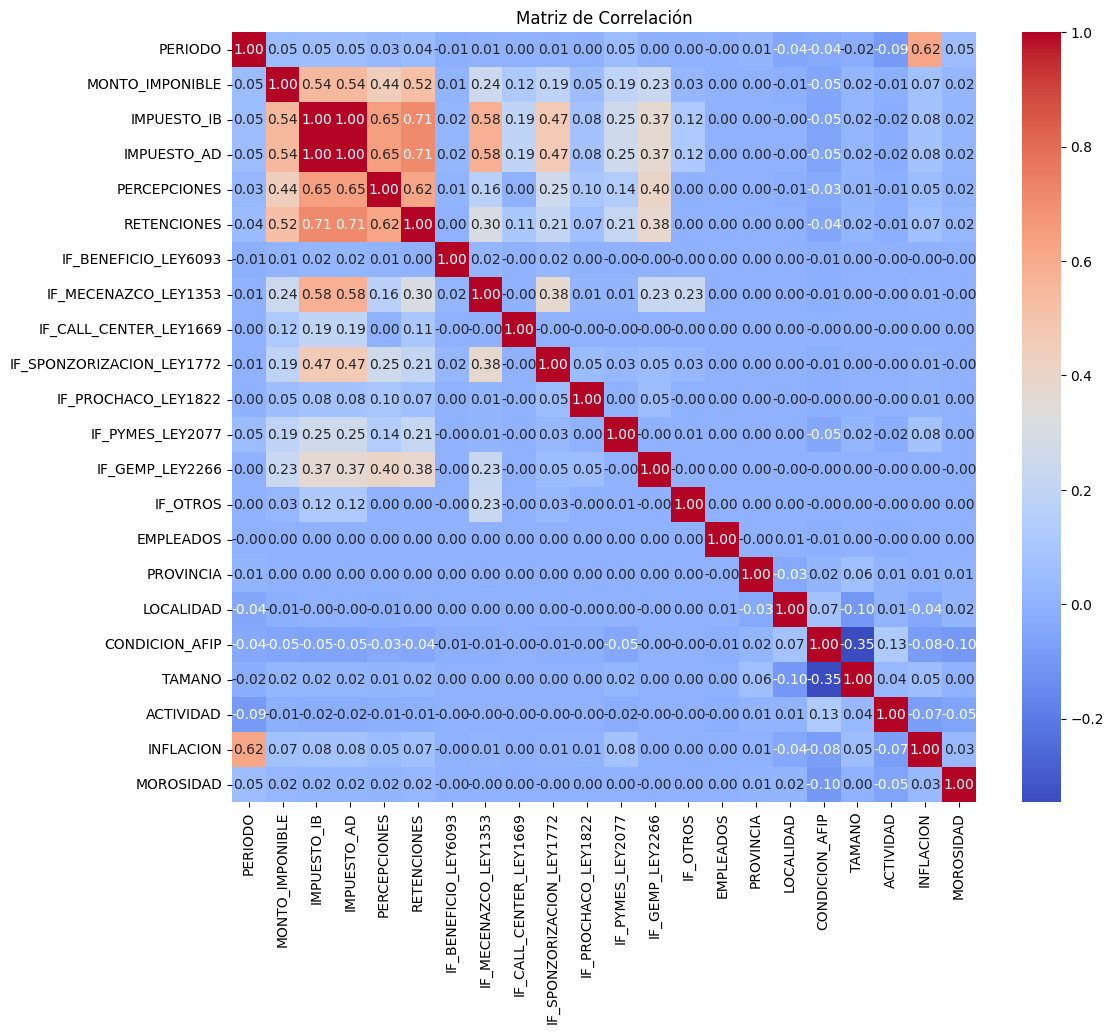

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
matriz_correlacion = dataset_work_2.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Box Plot e Histograma de:

- **IMPUESTO_IB**
- **IMPUESTO_AD**

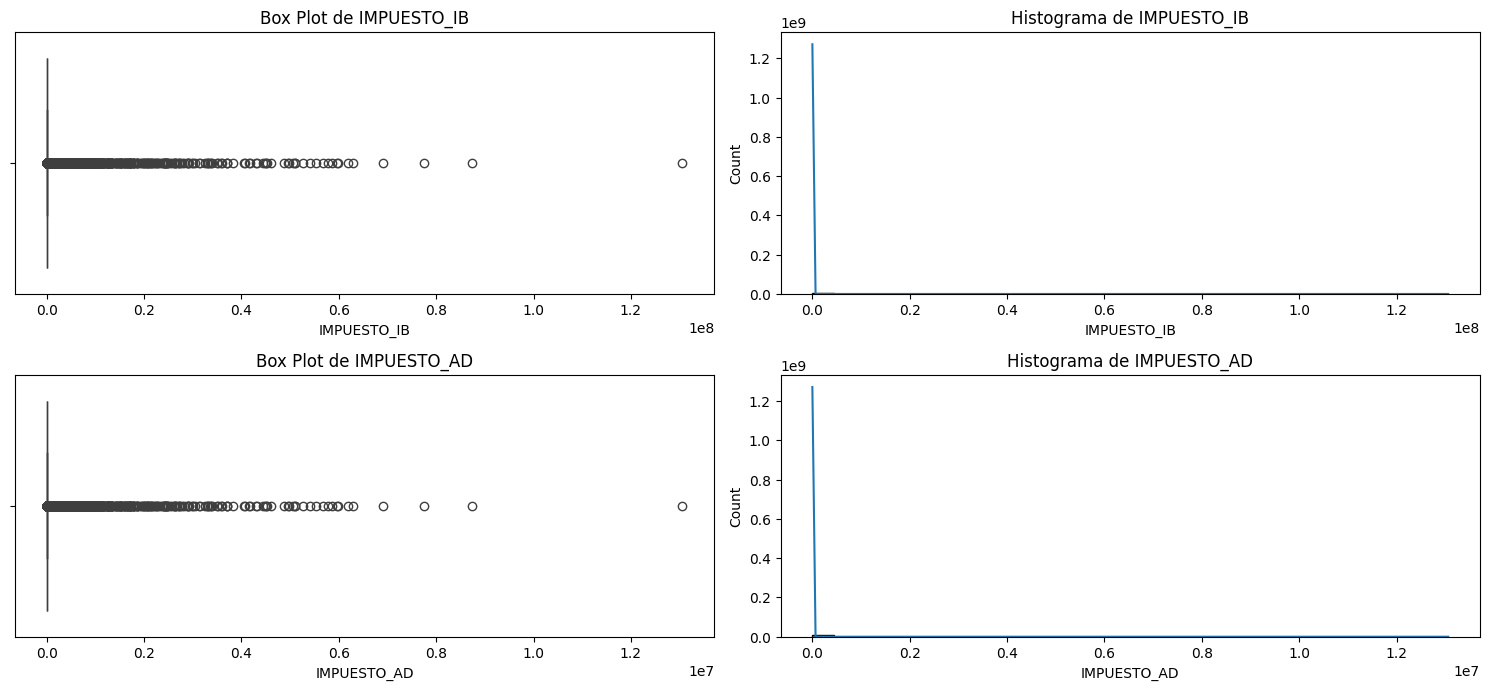

In [7]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 15 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_2['IMPUESTO_IB'])
plt.title('Box Plot de IMPUESTO_IB')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_2['IMPUESTO_IB'], bins=30, kde=True)
plt.title('Histograma de IMPUESTO_IB')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 15 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_2['IMPUESTO_AD'])
plt.title('Box Plot de IMPUESTO_AD')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_2['IMPUESTO_AD'], bins=30, kde=True)
plt.title('Histograma de IMPUESTO_AD')

# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

En base a este análisis, podemos realizar una unificación entre las variables **IMPUESTO_IB** e **IMPUESTO_AD**, dado que existe una relación directa entre ambas, siendo **IMPUESTO_AD** el 10% de **IMPUESTO_IB**. Esta relación permite simplificar el manejo de los datos consolidando ambas variables en una sola.

Adicionalmente, observamos que la variable **Incentivo Fiscal** presenta valores atípicos (outliers). Para abordar esto, podemos unificar sus registros sumando todos sus montos, lo que permitirá reducir la complejidad y mejorar la consistencia en el análisis.

In [8]:
# Crear una nueva variable que sume IMPUESTO_IB e IMPUESTO_AD
dataset_work_2['IMPUESTO_TOTAL'] = dataset_work_2['IMPUESTO_IB'] + dataset_work_2['IMPUESTO_AD']

# Copiamos el dataset en otro para seguir trabajando y resguardar el dataset original 
dataset_work_4 = dataset_work_2.copy()

# Opcional: eliminar las variables originales si ya no son necesarias
dataset_work_4 = dataset_work_4.drop(columns=['IMPUESTO_IB', 'IMPUESTO_AD'])

# Mostrar las primeras filas del DataFrame para verificar el resultado
dataset_work_4.head()


,PERIODO,MONTO_IMPONIBLE,PERCEPCIONES,RETENCIONES,IF_BENEFICIO_LEY6093,IF_MECENAZCO_LEY1353,IF_CALL_CENTER_LEY1669,IF_SPONZORIZACION_LEY1772,IF_PROCHACO_LEY1822,IF_PYMES_LEY2077,...,IF_OTROS,EMPLEADOS,PROVINCIA,LOCALIDAD,CONDICION_AFIP,TAMANO,ACTIVIDAD,INFLACION,MOROSIDAD,IMPUESTO_TOTAL
0,201801,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.997344,0.030678,0.689146,0.627061,0.000944,1.76,0,0.00
1,201801,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.997344,0.008452,0.689146,0.350118,0.086370,1.76,0,0.00
2,201801,13050.13,0.0,359.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.997344,0.049047,0.689146,0.350118,0.023020,1.76,1,358.88
3,201801,6800.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.997344,0.004655,0.689146,0.627061,0.086370,1.76,1,261.80
4,201801,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0.997344,0.003761,0.689146,0.627061,0.001259,1.76,0,0.00


Ordenar las columnas

In [9]:
import pandas as pd

# Asegúrate de que las columnas de tu DataFrame estén en el orden correcto y eliminando las que no necesites
columns_order = ['PERIODO', 'MONTO_IMPONIBLE', 'IMPUESTO_TOTAL', 'PERCEPCIONES', 'RETENCIONES',
       'IF_BENEFICIO_LEY6093', 'IF_MECENAZCO_LEY1353',
       'IF_CALL_CENTER_LEY1669', 'IF_SPONZORIZACION_LEY1772',
       'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077', 'IF_GEMP_LEY2266',
       'IF_OTROS', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD']
# Reorganizar las columnas del DataFrame
dataset_work_4 = dataset_work_4[columns_order]

dataset_work_4.columns


Index(['PERIODO', 'MONTO_IMPONIBLE', 'IMPUESTO_TOTAL', 'PERCEPCIONES',
       'RETENCIONES', 'IF_BENEFICIO_LEY6093', 'IF_MECENAZCO_LEY1353',
       'IF_CALL_CENTER_LEY1669', 'IF_SPONZORIZACION_LEY1772',
       'IF_PROCHACO_LEY1822', 'IF_PYMES_LEY2077', 'IF_GEMP_LEY2266',
       'IF_OTROS', 'EMPLEADOS', 'PROVINCIA', 'LOCALIDAD', 'CONDICION_AFIP',
       'TAMANO', 'ACTIVIDAD', 'INFLACION', 'MOROSIDAD'],
      dtype='object')

### Histograma de:

- **PERIODO**
- **MONTO_IMPONIBLE**
- **IMPUESTO_TOTAL**

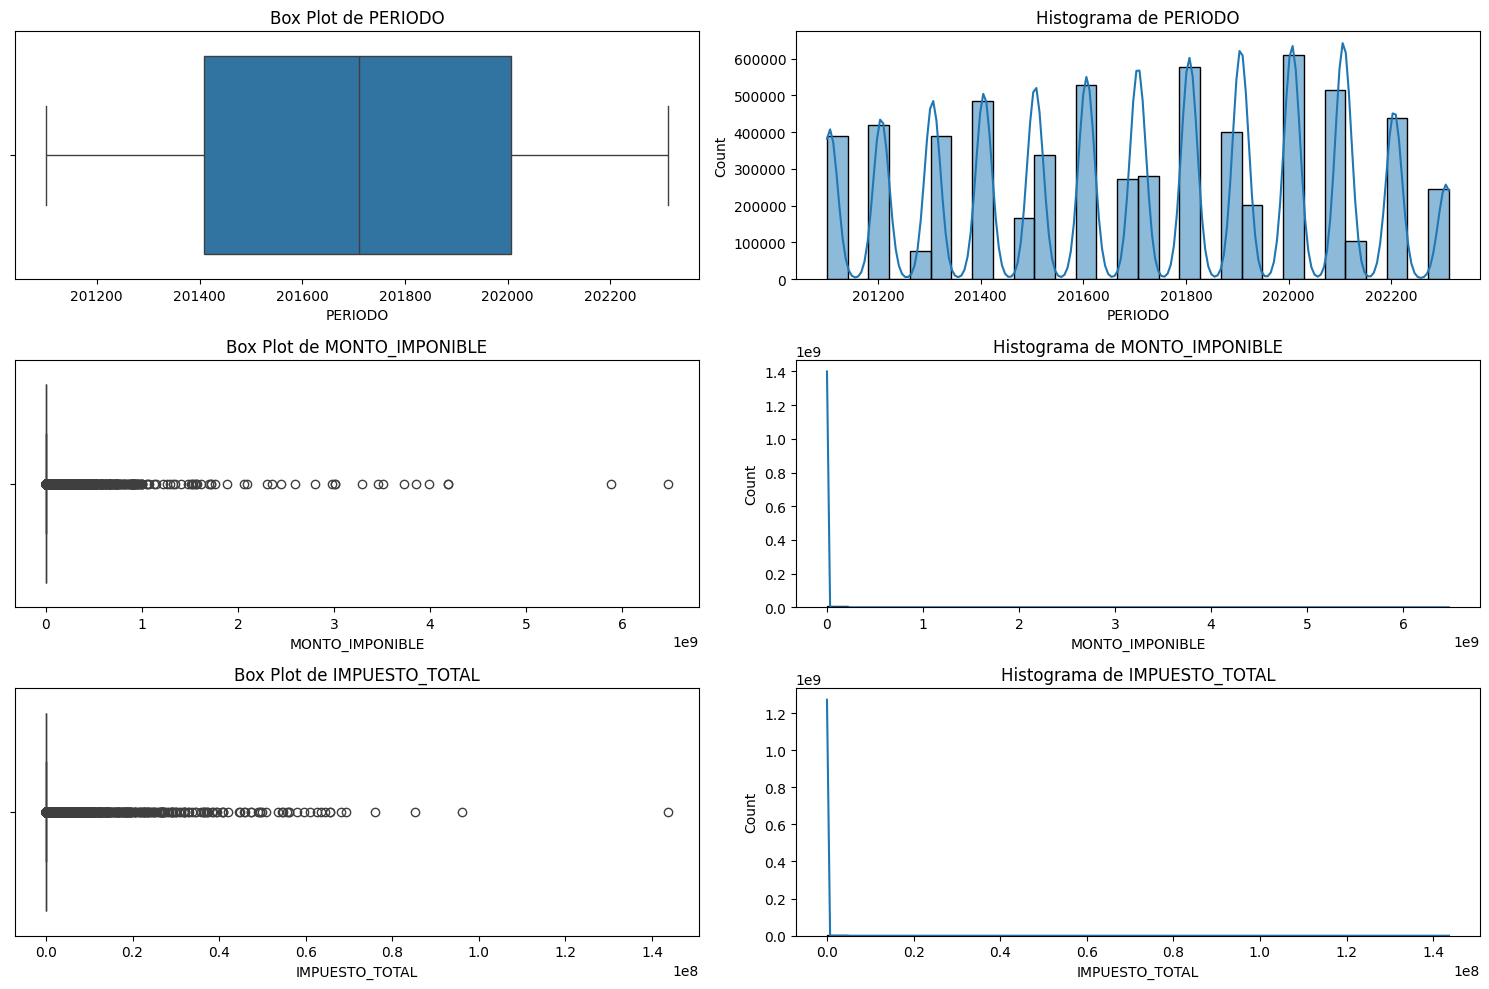

In [10]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 15 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['PERIODO'])
plt.title('Box Plot de PERIODO')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['PERIODO'], bins=30, kde=True)
plt.title('Histograma de PERIODO')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 15 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['MONTO_IMPONIBLE'])
plt.title('Box Plot de MONTO_IMPONIBLE')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['MONTO_IMPONIBLE'], bins=30, kde=True)
plt.title('Histograma de MONTO_IMPONIBLE')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,5)  # 15 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IMPUESTO_TOTAL'])
plt.title('Box Plot de IMPUESTO_TOTAL')

# Crear el histograma
plt.subplot(3, 2, 6)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IMPUESTO_TOTAL'], bins=30, kde=True)
plt.title('Histograma de IMPUESTO_TOTAL')
# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

### Histograma de:

- **PERCEPCIONES**
- **RETENCIONES**
- **EMPLEADOS**

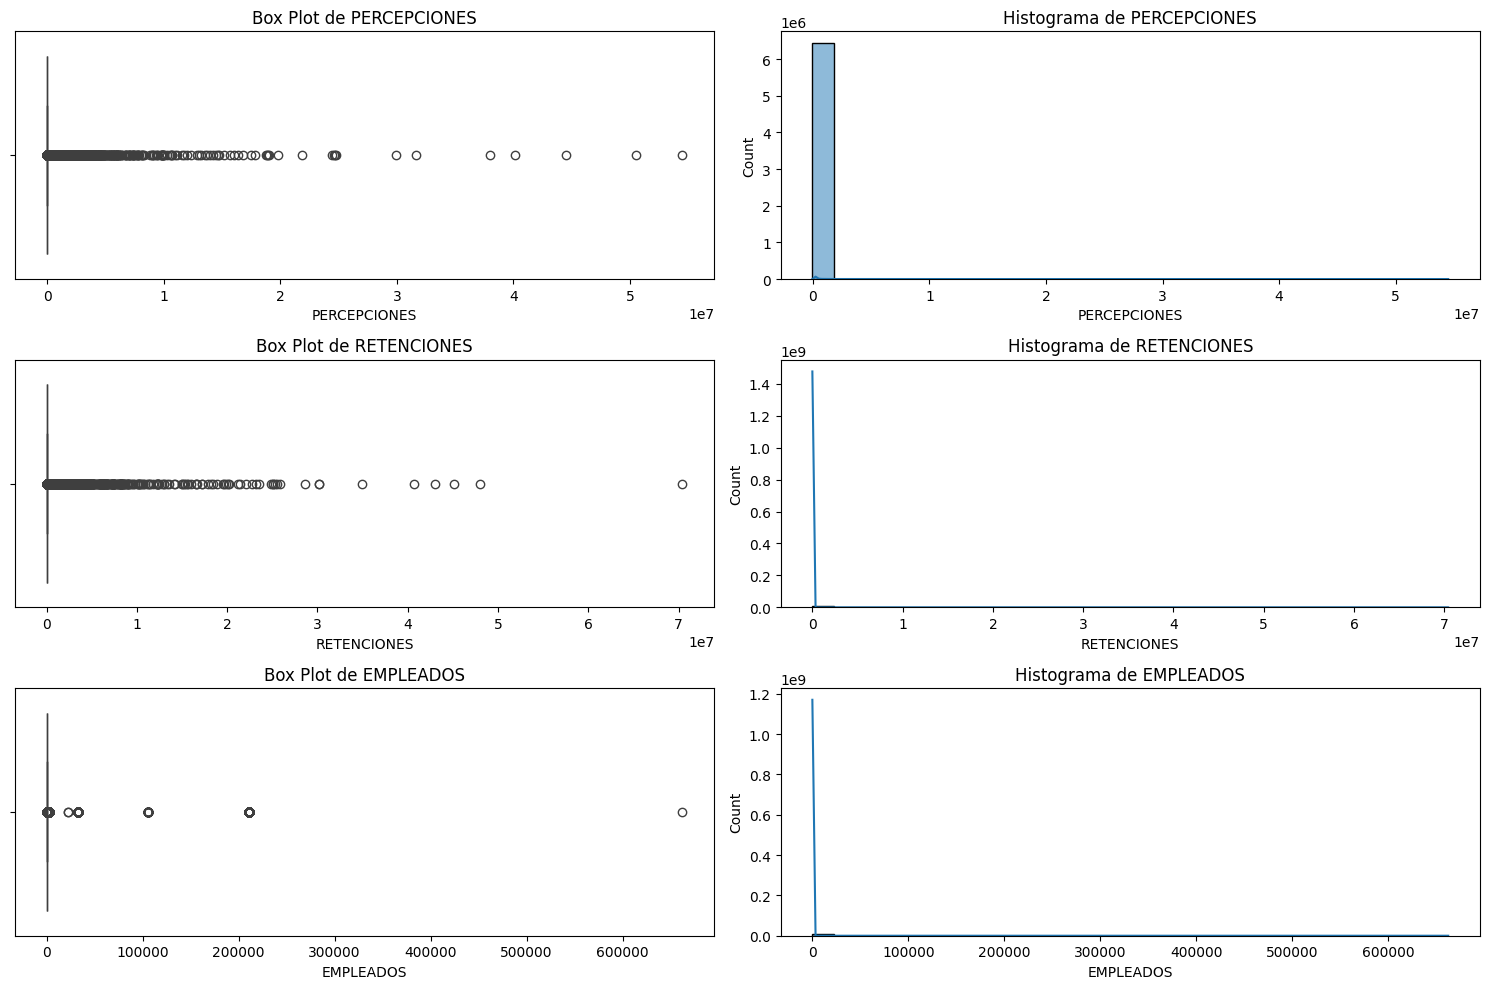

In [11]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['PERCEPCIONES'])
plt.title('Box Plot de PERCEPCIONES')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['PERCEPCIONES'], bins=30, kde=True)
plt.title('Histograma de PERCEPCIONES')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['RETENCIONES'])
plt.title('Box Plot de RETENCIONES')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['RETENCIONES'], bins=30, kde=True)
plt.title('Histograma de RETENCIONES')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,5)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['EMPLEADOS'])
plt.title('Box Plot de EMPLEADOS')

# Crear el histograma
plt.subplot(3, 2, 6)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['EMPLEADOS'], bins=30, kde=True)
plt.title('Histograma de EMPLEADOS')
# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

### Histograma de:

- **IF_BENEFICIO_LEY6093**
- **IF_MECENAZGO_LEY1353**
- **IF_CALL_CENTER_LEY1669**
- **IF_SPONZORIZACION_LEY1772**
- **IF_PROCHACO_LEY1822**
- **IF_PYMES_LEY2077**
- **IF_GEMP_LEY2266**
- **IF_OTROS**
- **INFLACION**

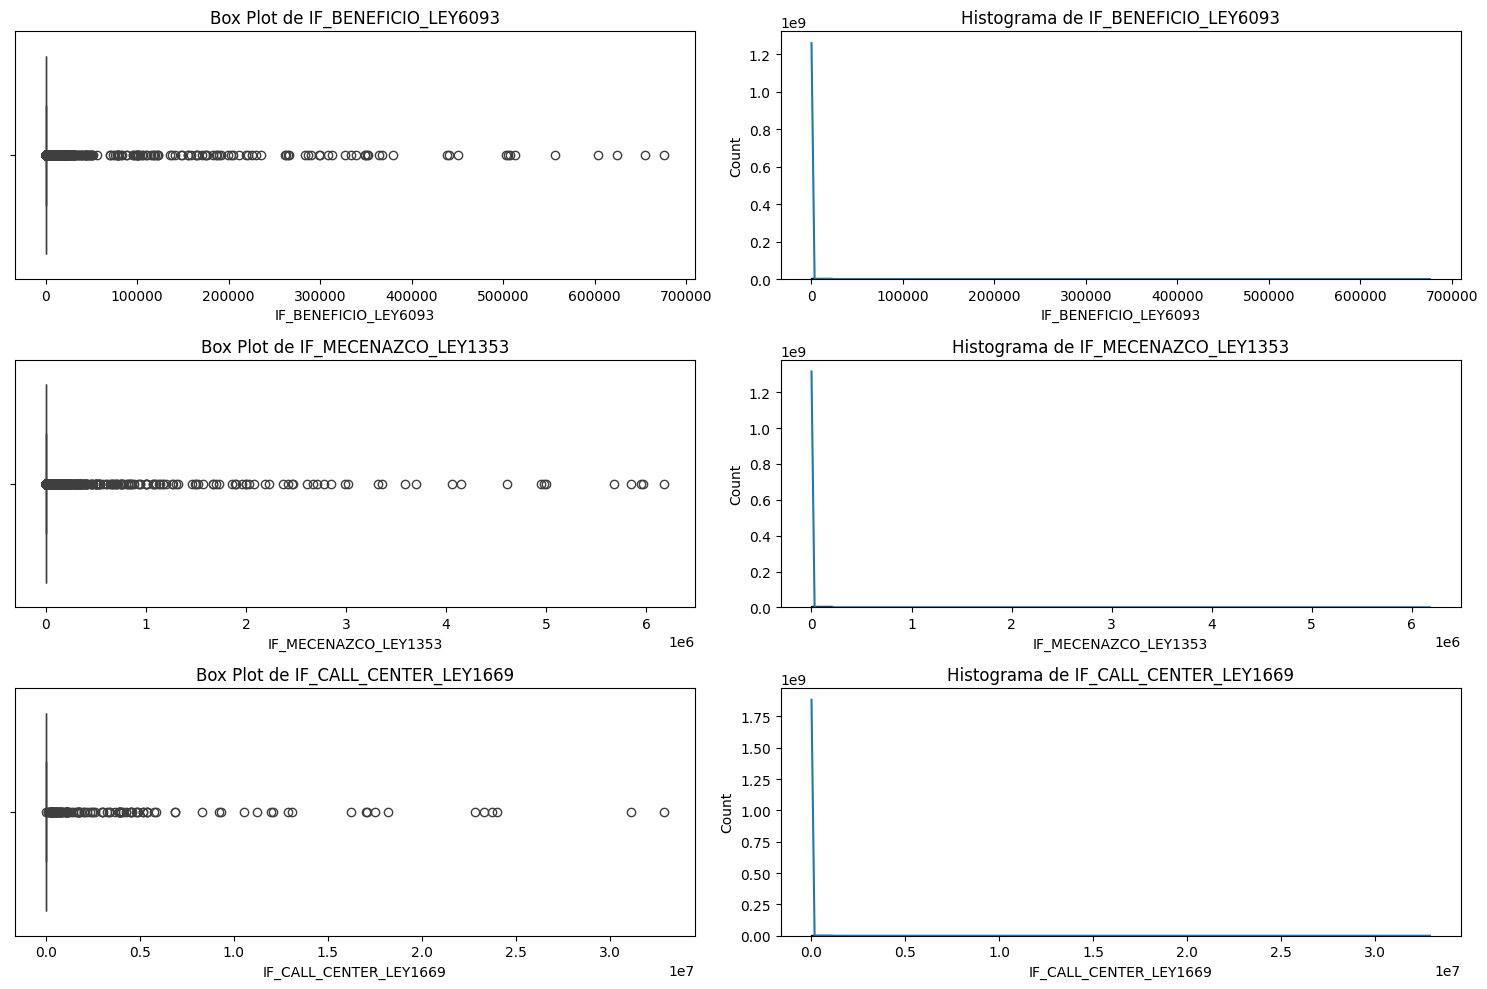

In [12]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_BENEFICIO_LEY6093'])
plt.title('Box Plot de IF_BENEFICIO_LEY6093')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_BENEFICIO_LEY6093'], bins=30, kde=True)
plt.title('Histograma de IF_BENEFICIO_LEY6093')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_MECENAZCO_LEY1353'])
plt.title('Box Plot de IF_MECENAZCO_LEY1353')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_MECENAZCO_LEY1353'], bins=30, kde=True)
plt.title('Histograma de IF_MECENAZCO_LEY1353')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,5)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_CALL_CENTER_LEY1669'])
plt.title('Box Plot de IF_CALL_CENTER_LEY1669')

# Crear el histograma
plt.subplot(3, 2, 6)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_CALL_CENTER_LEY1669'], bins=30, kde=True)
plt.title('Histograma de IF_CALL_CENTER_LEY1669')
# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()


# Mostrar todos los gráficos
plt.show()

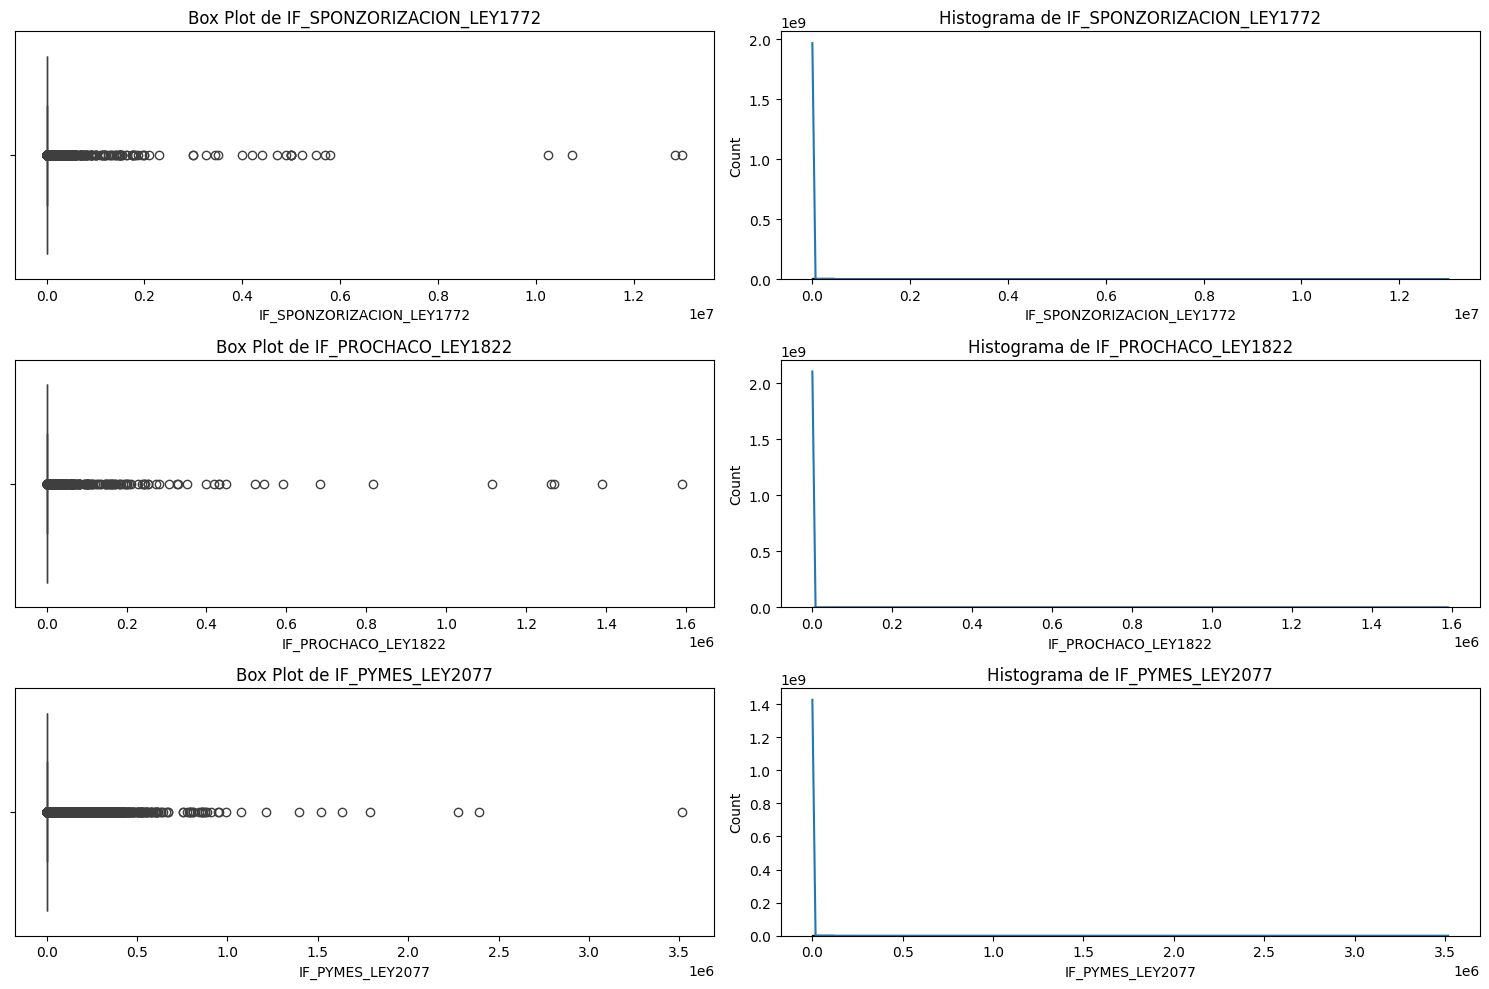

In [13]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_SPONZORIZACION_LEY1772'])
plt.title('Box Plot de IF_SPONZORIZACION_LEY1772')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_SPONZORIZACION_LEY1772'], bins=30, kde=True)
plt.title('Histograma de IF_SPONZORIZACION_LEY1772')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_PROCHACO_LEY1822'])
plt.title('Box Plot de IF_PROCHACO_LEY1822')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_PROCHACO_LEY1822'], bins=30, kde=True)
plt.title('Histograma de IF_PROCHACO_LEY1822')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,5)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_PYMES_LEY2077'])
plt.title('Box Plot de IF_PYMES_LEY2077')

# Crear el histograma
plt.subplot(3, 2, 6)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_PYMES_LEY2077'], bins=30, kde=True)
plt.title('Histograma de IF_PYMES_LEY2077')
# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()


# Mostrar todos los gráficos
plt.show()

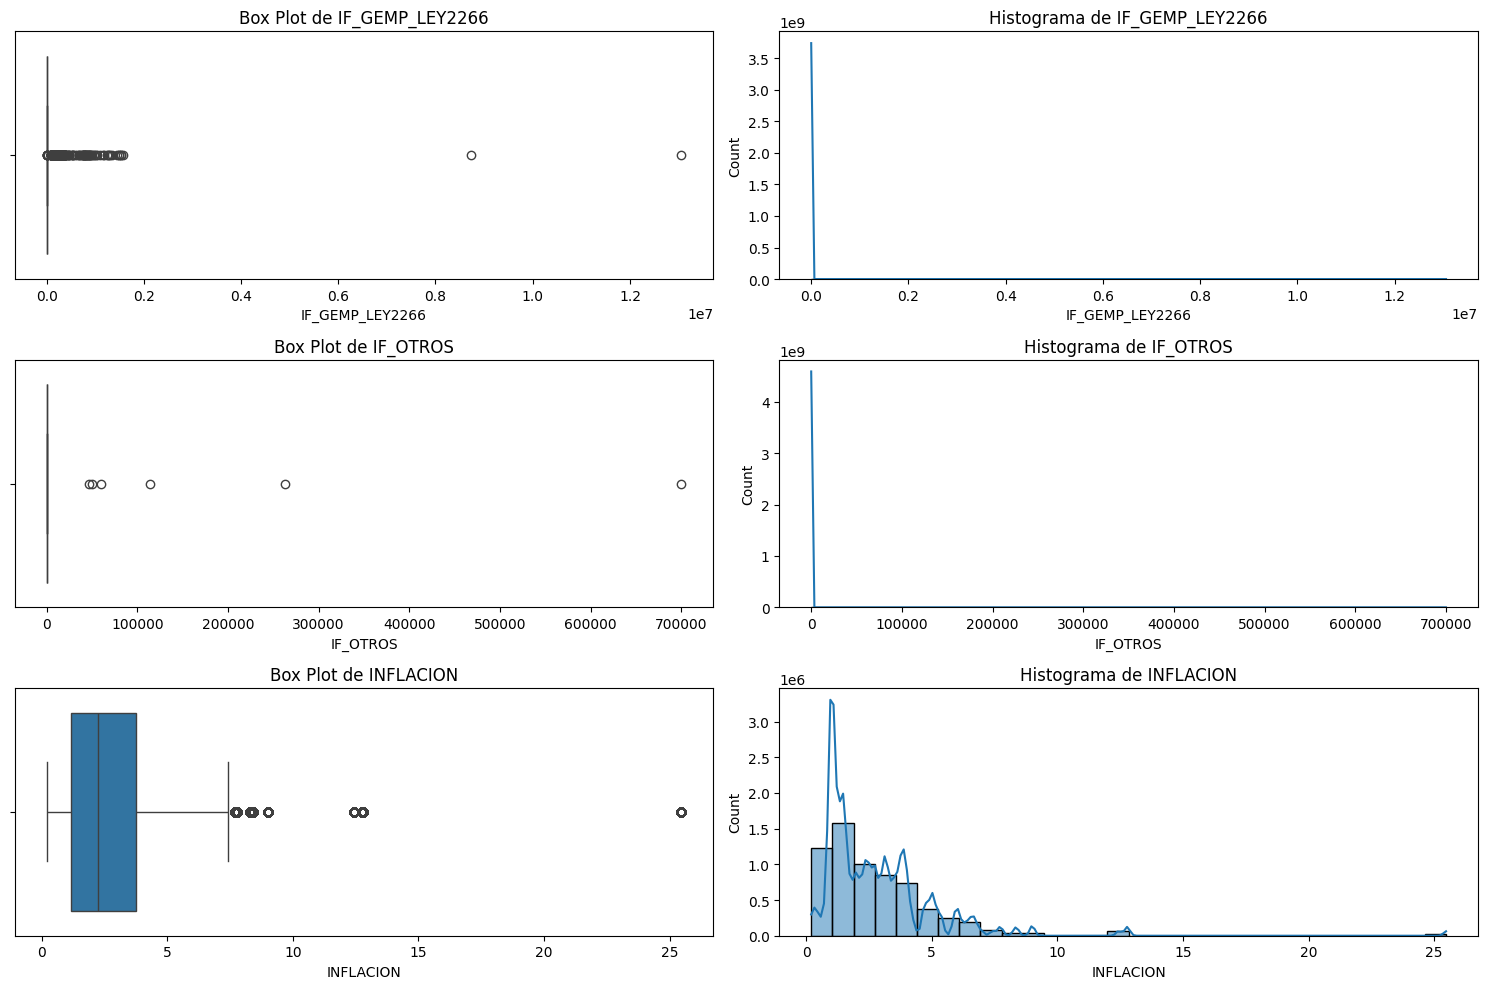

In [14]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_GEMP_LEY2266'])
plt.title('Box Plot de IF_GEMP_LEY2266')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_GEMP_LEY2266'], bins=30, kde=True)
plt.title('Histograma de IF_GEMP_LEY2266')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['IF_OTROS'])
plt.title('Box Plot de IF_OTROS')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['IF_OTROS'], bins=30, kde=True)
plt.title('Histograma de IF_OTROS')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,5)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['INFLACION'])
plt.title('Box Plot de INFLACION')

# Crear el histograma
plt.subplot(3, 2, 6)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['INFLACION'], bins=30, kde=True)
plt.title('Histograma de INFLACION')
# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()


# Mostrar todos los gráficos
plt.show()

### Histograma de las variables que eran Categoricas:

- **PROVINCIA**
- **LOCALIDAD**
- **TIPO_AFIP**
- **TAMANO**
- **ACTIVIDAD**

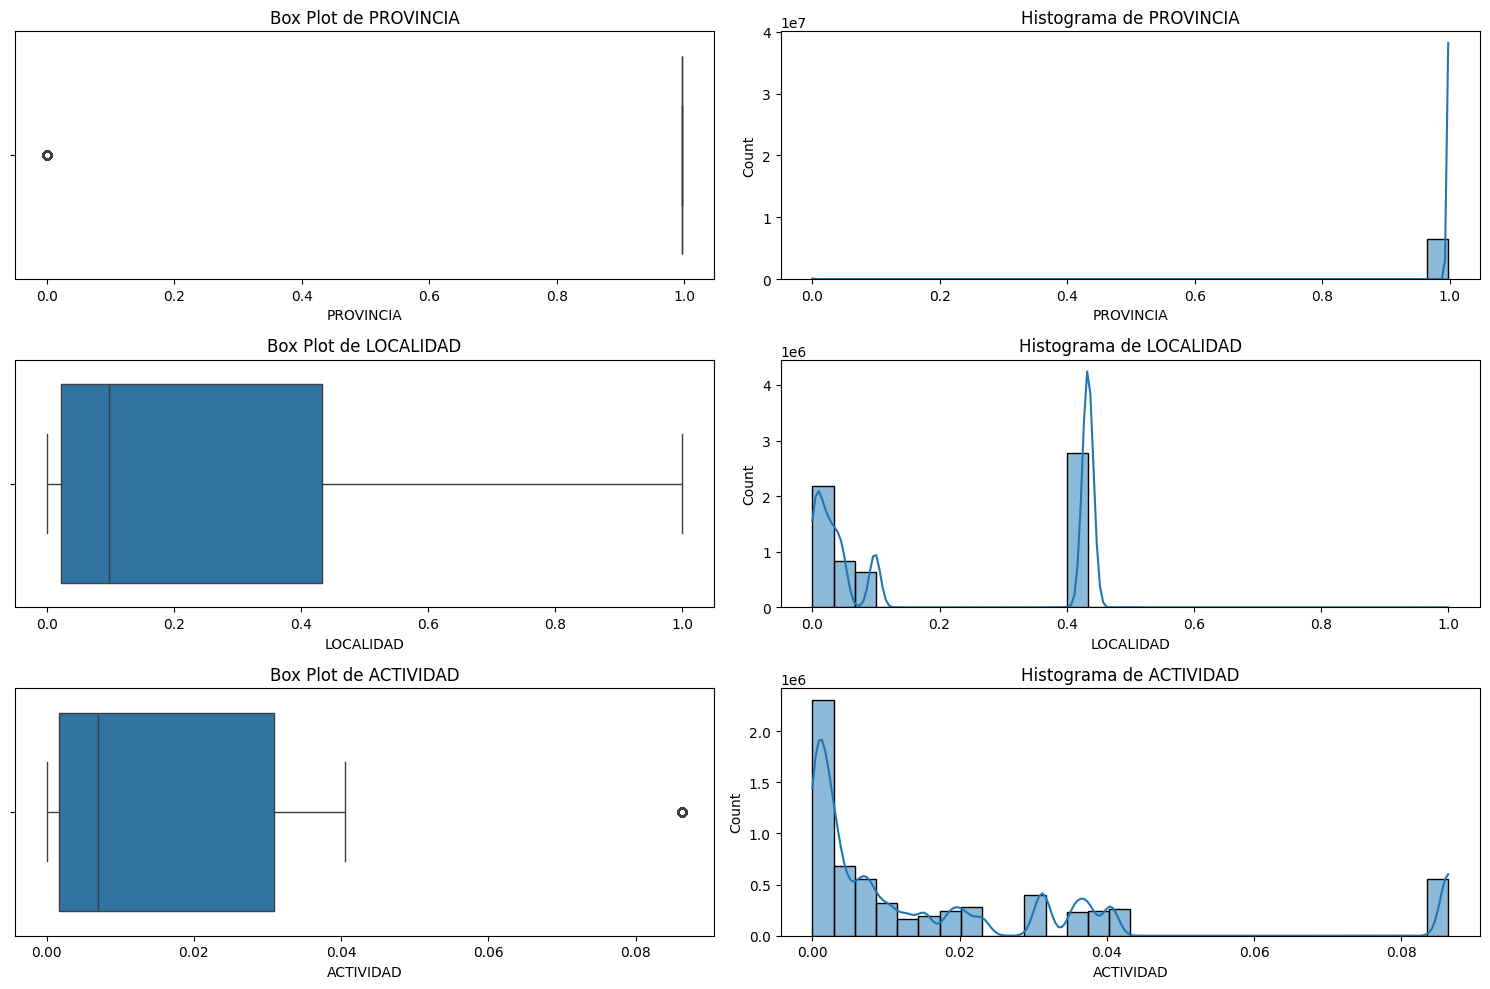

In [15]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['PROVINCIA'])
plt.title('Box Plot de PROVINCIA')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['PROVINCIA'], bins=30, kde=True)
plt.title('Histograma de PROVINCIA')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['LOCALIDAD'])
plt.title('Box Plot de LOCALIDAD')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['LOCALIDAD'], bins=30, kde=True)
plt.title('Histograma de LOCALIDAD')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,5)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['ACTIVIDAD'])
plt.title('Box Plot de ACTIVIDAD')

# Crear el histograma
plt.subplot(3, 2, 6)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['ACTIVIDAD'], bins=30, kde=True)
plt.title('Histograma de ACTIVIDAD')
# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

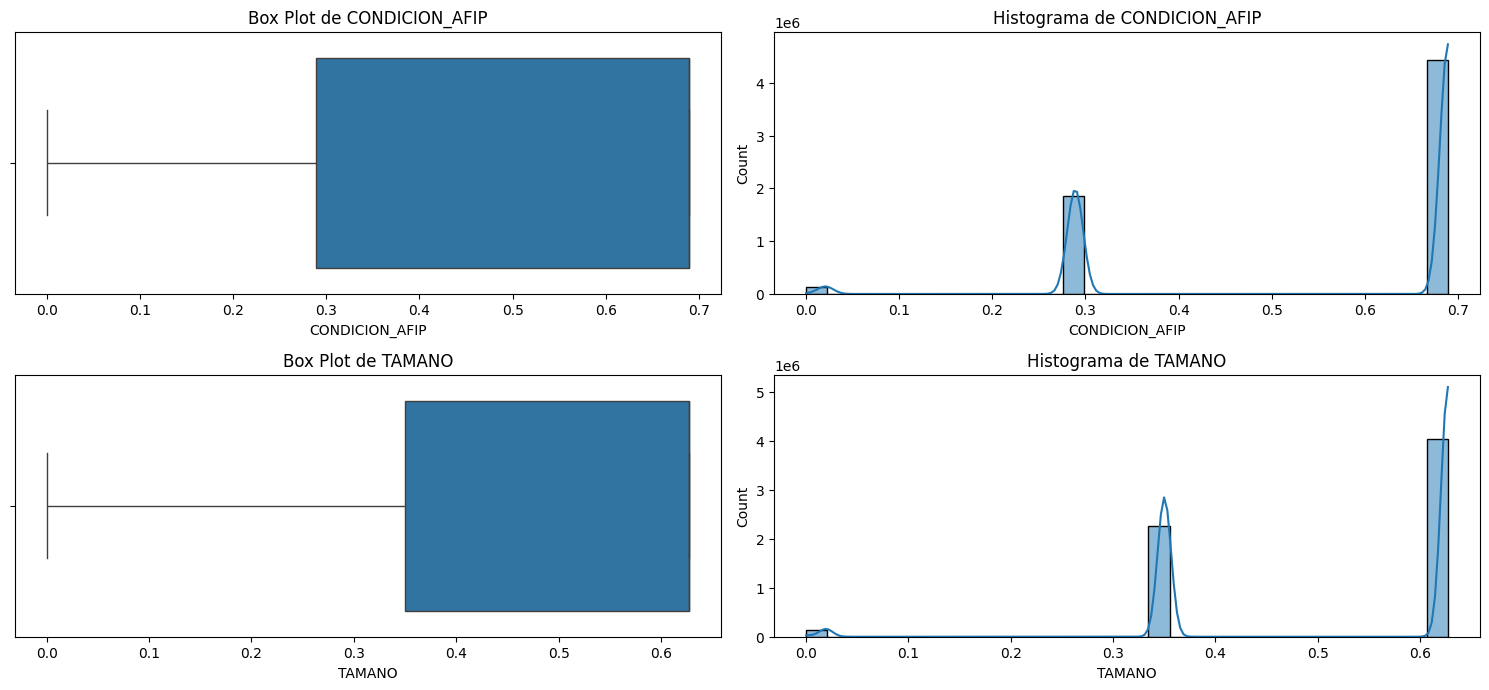

In [16]:
# Configurar el tamaño de la figura para contener todos los gráficos
plt.figure(figsize=(15, 10))

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2, 1)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['CONDICION_AFIP'])
plt.title('Box Plot de CONDICION_AFIP')

# Crear el histograma
plt.subplot(3, 2, 2)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['CONDICION_AFIP'], bins=30, kde=True)
plt.title('Histograma de CONDICION_AFIP')

# Crear el diagrama de caja (box plot)
plt.subplot(3, 2,3)  # 3 filas, 2 columnas, primer gráfico
sns.boxplot(x=dataset_work_4['TAMANO'])
plt.title('Box Plot de TAMANO')

# Crear el histograma
plt.subplot(3, 2, 4)  # 3 filas, 2 columnas, segundo gráfico
sns.histplot(dataset_work_4['TAMANO'], bins=30, kde=True)
plt.title('Histograma de TAMANO')

# Ajustar el espaciado para que los gráficos no se superpongan
plt.tight_layout()

# Mostrar todos los gráficos
plt.show()

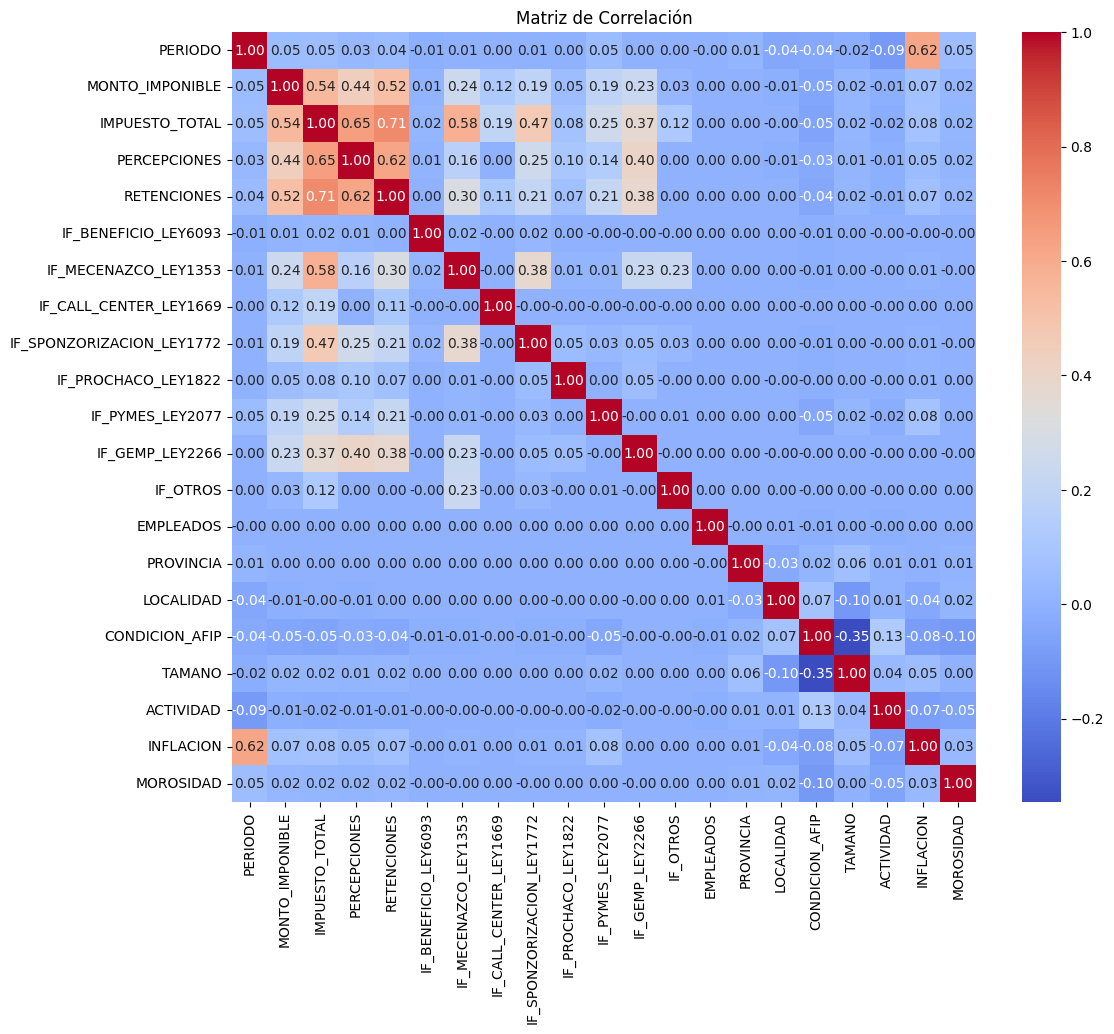

In [17]:
# Calcular la matriz de correlación
matriz_correlacion = dataset_work_4.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Determinamos los outliers

In [18]:
# Lista de variables numéricas a analizar
variables = dataset_work_4

outliers_summary = {}

# Calcular outliers usando IQR para cada variable
for variable in variables:
    Q1 = dataset_work_4[variable].quantile(0.25)
    Q3 = dataset_work_4[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtrar outliers
    outliers = dataset_work_4[(dataset_work_4[variable] < lower_bound) | (dataset_work_4[variable] > upper_bound)]
    
    # Guardar resultados en un diccionario
    outliers_summary[variable] = {
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Number of Outliers': len(outliers)
    }

# Convertir el resumen de outliers en un DataFrame para una mejor visualización
outliers_summary_dataset_work_4 = pd.DataFrame(outliers_summary).T

print(outliers_summary_dataset_work_4)

                             Lower Bound    Upper Bound  Number of Outliers
PERIODO                    200512.000000  202904.000000                 0.0
MONTO_IMPONIBLE            -62527.500000  104212.500000            996789.0
IMPUESTO_TOTAL              -1892.580000    3154.300000            972996.0
PERCEPCIONES                    0.000000       0.000000            992664.0
RETENCIONES                     0.000000       0.000000           1600538.0
IF_BENEFICIO_LEY6093            0.000000       0.000000              4984.0
IF_MECENAZCO_LEY1353            0.000000       0.000000              1527.0
IF_CALL_CENTER_LEY1669          0.000000       0.000000               130.0
IF_SPONZORIZACION_LEY1772       0.000000       0.000000              2591.0
IF_PROCHACO_LEY1822             0.000000       0.000000               637.0
IF_PYMES_LEY2077                0.000000       0.000000            440303.0
IF_GEMP_LEY2266                 0.000000       0.000000               194.0
IF_OTROS    

### Resguardamos el DataSet

Resguardamos el dataset resultante en un nuevo archivo para poder seguir procesandolo.

In [19]:
# Especifica el nombre del archivo CSV donde se guardarán los datos
output_file = 'D:\DataSet\dataset_work_2.csv'

# Guarda el DataFrame en un archivo CSV
dataset_work_4.to_csv(output_file, index=False, encoding='utf-8')

# Mensaje de confirmación
print(f'DataFrame guardado en {output_file}')

DataFrame guardado en D:\DataSet\dataset_work_2.csv
